In [1]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint
from pyspark import SparkConf, SparkContext
from numpy import array

In [2]:
def numClass(elem):
    '''Function which transform "B" into 1 and else things into 0
    - elem : string
    - return : vector
    '''
     
    if elem == 'B' :
        return 1
    else :
        return 0

In [35]:
#convert a list of raw fields from csv file to a
#LabeledPoint that MLib can use.All data must be numerical
def createLabeledPoint(fields):
    #print("good")
    #print(type(fields))
    f1 = []
    f1.append(fields[0])
    j= range(2,31)
    for i in j:
        f1.append(fields[i])
    f=numClass(fields[1])
    
    return LabeledPoint(f,f1)

In [36]:

conf=SparkConf().setMaster("local").setAppName("Decision Tree")
sc= SparkContext(conf=conf)

In [37]:
data = sc.textFile("C:/Users/radhi/Desktop/BigData/wdbc1.txt")

In [38]:
data.count()

569

In [39]:
#split each line into a list based on comma delimiter 
data1= data.map(lambda x: x.split(","))

In [40]:
#Convert these list to LabeledPoints
data2 = data1.map(createLabeledPoint)

In [41]:
data2.count()


569

In [42]:
#randomly spliting whole dataset into training and testing
(trainingData, testData) = data2.randomSplit([0.7, 0.3])

In [ ]:
#train DecisionTree Classifier using trainingData set
model_rf = DecisionTree.trainClassifier(trainingData,numClasses=2,
        categoricalFeaturesInfo = {},
        impurity='entropy', maxDepth=3, maxBins=32)

In [44]:
predictions = model_rf.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)

In [45]:
c=testData.map(lambda lp: lp.label)

In [46]:
a = c.collect()

In [47]:
len(a)

159

In [48]:
b = predictions.collect()

In [49]:
len(b)

159

In [50]:
confusion_matrix(a,b)

array([[53,  3],
       [12, 91]], dtype=int64)

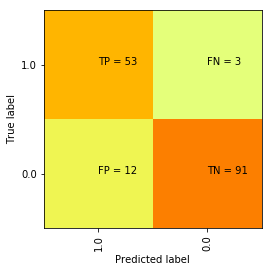

In [51]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
classNames = ['0,0','1.0']
conf1=confusion_matrix(a, b)
#plt.imshow(conf1, cmap='binary', interpolation='None')
#plt.show()
plt.clf()
plt.imshow(conf1, interpolation='None', cmap=plt.cm.Wistia)
classNames = ['1.0','0.0']
#plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf1[i][j]))
plt.show()

In [52]:
#print decision tree
print(model_rf.toDebugString())

DecisionTreeModel classifier of depth 3 with 15 nodes
  If (feature 23 <= 104.94999999999999)
   If (feature 27 <= 0.38)
    If (feature 11 <= 0.6084)
     Predict: 1.0
    Else (feature 11 > 0.6084)
     Predict: 0.0
   Else (feature 27 > 0.38)
    If (feature 25 <= 0.16394999999999998)
     Predict: 1.0
    Else (feature 25 > 0.16394999999999998)
     Predict: 0.0
  Else (feature 23 > 104.94999999999999)
   If (feature 8 <= 0.051855)
    If (feature 22 <= 26.32)
     Predict: 1.0
    Else (feature 22 > 26.32)
     Predict: 0.0
   Else (feature 8 > 0.051855)
    If (feature 2 <= 15.495000000000001)
     Predict: 0.0
    Else (feature 2 > 15.495000000000001)
     Predict: 0.0

